In [1]:
from ga4stpg.tree.pxsteinertree import PartitionCrossoverSteinerTree as PSTX

In [2]:
from os import path
from pprint import pprint
from ga4stpg.graph import UGraph
from ga4stpg.graph.reader import ReaderORLibrary

instance_problem = "steinb5.txt"
folder_datasets = path.join('..', '..', 'ppgi-stpg-gpx', 'datasets', 'ORLibrary')
filename = path.join(folder_datasets, instance_problem)

STPG = ReaderORLibrary().parser(filename)

In [3]:
print("STPG information", '\n', 10*'- ','\n')
print('Instance: ', STPG.name)
print("Nro. Node:", STPG.nro_nodes)
print("Nro. Edges:", STPG.nro_edges)
print("Nro. Terminals:", STPG.nro_terminals)
print("Terminals: \n", STPG.terminals)

STPG information 
 - - - - - - - - - -  

Instance:  B5
Nro. Node: 50
Nro. Edges: 100
Nro. Terminals: 13
Terminals: 
 {3, 35, 5, 37, 7, 39, 13, 15, 16, 20, 23, 24, 31}


In [4]:
from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedRandomWalk
from ga4stpg.tree.mutate import Prunning

generator = GenerateBasedRandomWalk(STPG)
evaluator = EvaluateTreeGraph(STPG)
prunning  = Prunning(STPG)

red  = generator()
blue = generator()

print(evaluator(red))
print(evaluator(blue))

(265, 1)
(270, 1)


In [5]:
red = prunning(red)
blue = prunning(blue)

print(evaluator(red))
print(evaluator(blue))

(150, 1)
(153, 1)


In [6]:
crossover = PSTX(STPG)

In [7]:
child     = UGraph()
red_only  = UGraph()
blue_only = UGraph()

for v, u in red.gen_undirect_edges():
    if blue.has_edge(v, u):
        child.add_edge(v, u)
    else:
        red_only.add_edge(v, u)

for v, u in blue.gen_undirect_edges():
    if not red.has_edge(v, u):
        blue_only.add_edge(v, u)

common_nodes_red = set(red_only.vertices) & set(blue.vertices)
common_nodes_blue = set(blue_only.vertices) & set(red.vertices)

red_partitions  = crossover.find_partitions(red_only, common_nodes_red)
blue_partitions = crossover.find_partitions(blue_only, common_nodes_blue)

In [8]:
vertices = common_nodes_red | common_nodes_blue

vertices |= set(child.vertices)

vertices

{1,
 2,
 3,
 5,
 7,
 9,
 10,
 12,
 13,
 15,
 16,
 19,
 20,
 21,
 23,
 24,
 31,
 35,
 37,
 39,
 42,
 47,
 49}

In [9]:
from ga4stpg.graph.disjointsets import DisjointSets

disjoint = DisjointSets()

for v in vertices:
    disjoint.make_set(v)

for v, u in child.gen_undirect_edges():
    disjoint.union(v, u)

In [10]:
len(disjoint.get_disjoint_sets()), len(vertices)

(14, 23)

In [11]:
red_partitions

[Partition <{23, 31}>,
 Partition <{10, 23}>,
 Partition <{1, 10}>,
 Partition <{1, 5}>,
 Partition <{24, 49, 7}>,
 Partition <{49, 35}>,
 Partition <{3, 21}>,
 Partition <{37, 21}>,
 Partition <{9, 3, 15}>,
 Partition <{20, 39}>,
 Partition <{16, 42}>]

In [12]:
blue_partitions

[Partition <{49, 21}>,
 Partition <{9, 21}>,
 Partition <{21, 31}>,
 Partition <{24, 9}>,
 Partition <{24, 37}>,
 Partition <{42, 23}>,
 Partition <{3, 39}>,
 Partition <{3, 20}>,
 Partition <{19, 20}>,
 Partition <{1, 35}>,
 Partition <{1, 7}>,
 Partition <{16, 2}>,
 Partition <{12, 15}>]

In [13]:
def matches_from(partitions):
    matches = dict()
    for partition in partitions:
        key = frozenset(disjoint.find(v) for v in partition.portal)
        matches[key] = partition
    return matches

In [14]:
red_matches = matches_from(red_partitions)
blue_matches = matches_from(blue_partitions)

In [15]:
red_matches

{frozenset({23, 31}): Partition <{23, 31}>,
 frozenset({19, 23}): Partition <{10, 23}>,
 frozenset({1, 19}): Partition <{1, 10}>,
 frozenset({1, 49}): Partition <{1, 5}>,
 frozenset({7, 24, 49}): Partition <{24, 49, 7}>,
 frozenset({12, 49}): Partition <{49, 35}>,
 frozenset({3, 21}): Partition <{3, 21}>,
 frozenset({19, 21}): Partition <{37, 21}>,
 frozenset({3, 15, 42}): Partition <{9, 3, 15}>,
 frozenset({12, 39}): Partition <{20, 39}>,
 frozenset({16, 42}): Partition <{16, 42}>}

In [16]:
blue_matches

{frozenset({21, 49}): Partition <{49, 21}>,
 frozenset({21, 42}): Partition <{9, 21}>,
 frozenset({21, 31}): Partition <{21, 31}>,
 frozenset({24, 42}): Partition <{24, 9}>,
 frozenset({19, 24}): Partition <{24, 37}>,
 frozenset({23, 42}): Partition <{42, 23}>,
 frozenset({3, 39}): Partition <{3, 39}>,
 frozenset({3, 12}): Partition <{3, 20}>,
 frozenset({12, 19}): Partition <{19, 20}>,
 frozenset({1, 12}): Partition <{1, 35}>,
 frozenset({1, 7}): Partition <{1, 7}>,
 frozenset({12, 16}): Partition <{16, 2}>,
 frozenset({12, 15}): Partition <{12, 15}>}

In [17]:
import random

In [18]:
common_match = red_matches.keys() & blue_matches.keys()

common_match

set()

In [19]:
# common_match = red_matches.keys() & blue_matches.keys()

for key in common_match:
    red_p = red_matches.pop(key)
    blue_p = blue_matches.pop(key)

    choosed = None
    if red_p.cost == blue_p.cost:
        choosed = random.choice([red_p, blue_p])
        print(red_p, blue_p)
        print("Random ", choosed)
    elif red_p.cost < blue_p.cost:
        choosed = red_p
        print("Red: ", choosed)
    elif blue_p.cost < red_p.cost:
        choosed = blue_p
        print("Blue: ", choosed)

    for v, u in choosed.edges:
        child.add_edge(v, u)
    g_portals = iter(choosed.portal)
    last_p = next(g_portals)
    for p in g_portals:
        disjoint.union(last_p, p)
        last_p = p

In [20]:
len(disjoint.get_disjoint_sets())

14

In [21]:
red_matches = matches_from(red_matches.values())
blue_matches = matches_from(blue_matches.values())

In [22]:
red_matches

{frozenset({23, 31}): Partition <{23, 31}>,
 frozenset({19, 23}): Partition <{10, 23}>,
 frozenset({1, 19}): Partition <{1, 10}>,
 frozenset({1, 49}): Partition <{1, 5}>,
 frozenset({7, 24, 49}): Partition <{24, 49, 7}>,
 frozenset({12, 49}): Partition <{49, 35}>,
 frozenset({3, 21}): Partition <{3, 21}>,
 frozenset({19, 21}): Partition <{37, 21}>,
 frozenset({3, 15, 42}): Partition <{9, 3, 15}>,
 frozenset({12, 39}): Partition <{20, 39}>,
 frozenset({16, 42}): Partition <{16, 42}>}

In [23]:
blue_matches

{frozenset({21, 49}): Partition <{49, 21}>,
 frozenset({21, 42}): Partition <{9, 21}>,
 frozenset({21, 31}): Partition <{21, 31}>,
 frozenset({24, 42}): Partition <{24, 9}>,
 frozenset({19, 24}): Partition <{24, 37}>,
 frozenset({23, 42}): Partition <{42, 23}>,
 frozenset({3, 39}): Partition <{3, 39}>,
 frozenset({3, 12}): Partition <{3, 20}>,
 frozenset({12, 19}): Partition <{19, 20}>,
 frozenset({1, 12}): Partition <{1, 35}>,
 frozenset({1, 7}): Partition <{1, 7}>,
 frozenset({12, 16}): Partition <{16, 2}>,
 frozenset({12, 15}): Partition <{12, 15}>}

In [24]:
disjoint.find(47), disjoint.find(24)

(12, 24)

In [26]:
# disjoint.find(6), disjoint.find(18)

In [27]:
g_union = UGraph()

for v, u in red.gen_undirect_edges():
    g_union.add_edge(v, u)

for v, u in blue.gen_undirect_edges():
    g_union.add_edge(v, u)

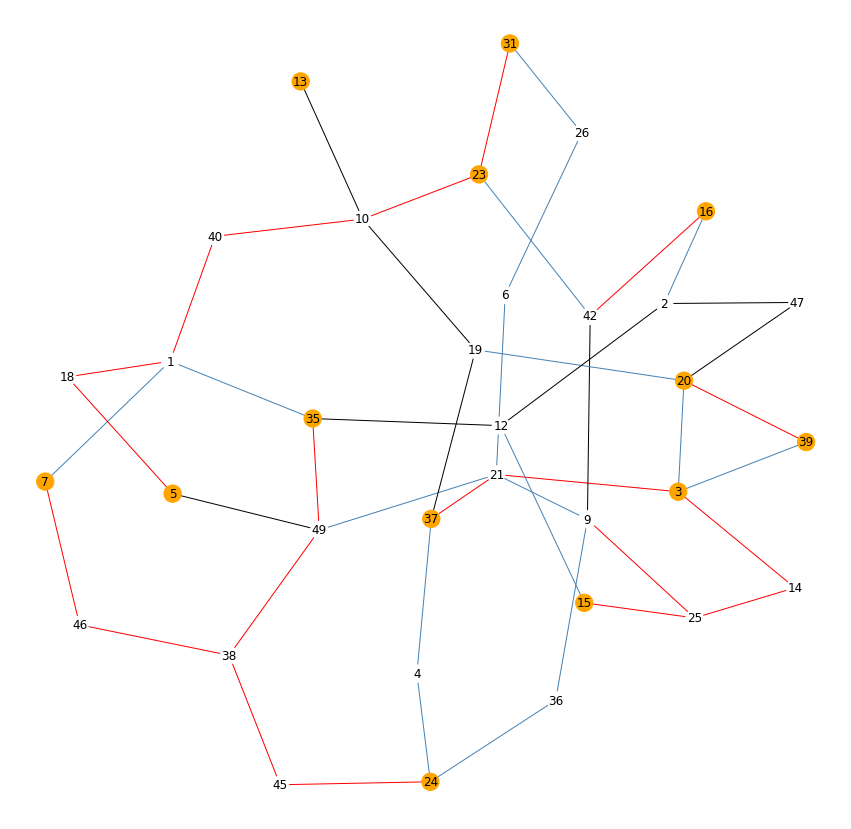

In [28]:
from draw import draw_common
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))

draw_common(g_union, STPG.terminals, red, blue)

In [29]:
from ga4stpg.tree.kruskalpartitioning import KruskalBasedPartitioning as KPX

recombiner = KPX(STPG)

In [30]:
other = recombiner(red, blue)

In [31]:
type(other)

ga4stpg.graph.graph.UndirectedGraph

In [32]:
evaluator(other)

(106, 1)

In [33]:
evaluator(red)

(150, 1)

In [34]:
evaluator(blue)

(153, 1)

In [35]:
from ga4stpg.graph.util import is_steiner_tree

is_steiner_tree(other, STPG)

(False,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': False,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [36]:
evaluator(prunning(other))

(100, 1)

In [37]:
prunning(other)
is_steiner_tree(prunning(other), STPG)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

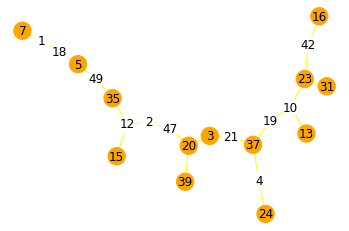

In [38]:
draw_common(prunning(other), STPG.terminals, UGraph(), UGraph())

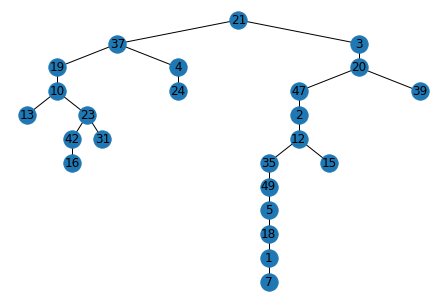

In [41]:
from draw import draw_tree

draw_tree(prunning(other), 21)

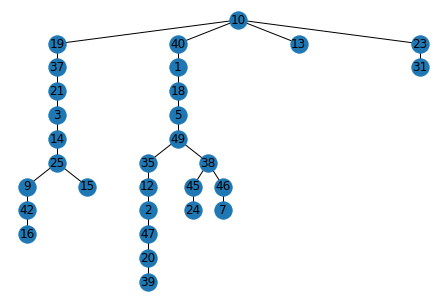

In [43]:
draw_tree(red, 10)

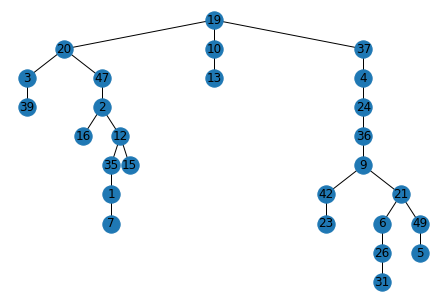

In [45]:
draw_tree(blue, 19)